In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
calendar = pd.read_csv('calendar.csv')
sales_train_validation = pd.read_csv('sales_train_validation.csv')
sell_prices = pd.read_csv('sell_prices.csv')
sample_submission = pd.read_csv('sample_submission.csv')

# Calendar

In [17]:
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [18]:
calendar.columns

Index(['date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI'],
      dtype='object')

In [19]:
calendar.shape

(1969, 14)

In [20]:
calendar['date']

0       2011-01-29
1       2011-01-30
2       2011-01-31
3       2011-02-01
4       2011-02-02
           ...    
1964    2016-06-15
1965    2016-06-16
1966    2016-06-17
1967    2016-06-18
1968    2016-06-19
Name: date, Length: 1969, dtype: object

In [21]:
date = pd.to_datetime(calendar['date'])
date[1968]-date[0]

Timedelta('1968 days 00:00:00')

In [22]:
calendar.isnull().sum()

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [23]:
event_name_1 = calendar['event_name_1'].dropna()
set(event_name_1)
len(set(event_name_1))

30

In [24]:
event_type_1 = calendar['event_type_1'].dropna()
set(event_type_1)

{'Cultural', 'National', 'Religious', 'Sporting'}

In [25]:
event_name_2 = calendar['event_name_2'].dropna()
set(event_name_2)

{'Cinco De Mayo', 'Easter', "Father's day", 'OrthodoxEaster'}

In [26]:
event_type_2 = calendar['event_type_2'].dropna()
set(event_type_2)

{'Cultural', 'Religious'}

In [27]:
calendar['d']

0          d_1
1          d_2
2          d_3
3          d_4
4          d_5
         ...  
1964    d_1965
1965    d_1966
1966    d_1967
1967    d_1968
1968    d_1969
Name: d, Length: 1969, dtype: object

In [28]:
sum(calendar['snap_CA'])

650

In [29]:
sum(calendar['snap_TX'])


650

In [30]:
sum(calendar['snap_WI'])

650

# sales_train_validation

In [31]:
sales_train_validation.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,5,0,1,0,0,2,0,3,1,1,2,0,1,3,0,0,0,0,0,0,3,0,1,0,0,1,4,0,0,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,0,1,0,0,1,0,0,0,1,2,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,0,4,6,5,7,0,13,2,2,20,9,3,0,1,0,0,0,10,4,4,2,6,2,0,0,0,0,0,0,0,...,2,0,17,11,0,2,13,10,2,0,0,0,0,11,5,2,12,38,22,2,0,10,26,8,12,4,5,2,8,4,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,0,2,3,9,0,0,4,3,1,0,4,4,1,2,0,1,1,5,2,2,2,3,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,2,0,3,0,0,0,0,0,1,1,0,7,0,0,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,3,0,0,0,0,0,0,0,0,1,1,1,1,0,3,2,2,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,2


In [32]:
sales_train_validation.shape

(30490, 1919)

In [33]:
len(set(sales_train_validation['id']))

30490

In [34]:
len(sales_train_validation['id'])

30490

In [35]:
len(set(sales_train_validation['item_id']))

3049

In [36]:
sales_train_validation[sales_train_validation['item_id'] == 'HOBBIES_1_001']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
3049,HOBBIES_1_001_CA_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_2,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,1,1,2,0,0,1,1,3,0,0,3,1,0,1,1,0,2,0,0,0,0,0,1,0,0,1,0,0,0,1,2,0,4,0,0,2,2
6098,HOBBIES_1_001_CA_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,2,0,1,1,6,2,0,2,1,2,1,0,0,0,4,2,1,0,2,0,0,2,1,0,0,0,0,0,2,4,0,1,1,1,0,3,3
9147,HOBBIES_1_001_CA_4_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_4,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,3,0,0,3,0,1,2,0,2,1,2,1,1,1,1,0,0,0,0,0,0,0,3,0,0,0,1,0,0,1,0,1,0,1,2,1
12196,HOBBIES_1_001_TX_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_1,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,2
15245,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,2,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
18294,HOBBIES_1_001_TX_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_3,TX,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0
21343,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0,1,0,0,1,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1
24392,HOBBIES_1_001_WI_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_2,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1
27441,HOBBIES_1_001_WI_3_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [37]:
sales_train_validation['id'][:30]

0     HOBBIES_1_001_CA_1_validation
1     HOBBIES_1_002_CA_1_validation
2     HOBBIES_1_003_CA_1_validation
3     HOBBIES_1_004_CA_1_validation
4     HOBBIES_1_005_CA_1_validation
5     HOBBIES_1_006_CA_1_validation
6     HOBBIES_1_007_CA_1_validation
7     HOBBIES_1_008_CA_1_validation
8     HOBBIES_1_009_CA_1_validation
9     HOBBIES_1_010_CA_1_validation
10    HOBBIES_1_011_CA_1_validation
11    HOBBIES_1_012_CA_1_validation
12    HOBBIES_1_013_CA_1_validation
13    HOBBIES_1_014_CA_1_validation
14    HOBBIES_1_015_CA_1_validation
15    HOBBIES_1_016_CA_1_validation
16    HOBBIES_1_017_CA_1_validation
17    HOBBIES_1_018_CA_1_validation
18    HOBBIES_1_019_CA_1_validation
19    HOBBIES_1_020_CA_1_validation
20    HOBBIES_1_021_CA_1_validation
21    HOBBIES_1_022_CA_1_validation
22    HOBBIES_1_023_CA_1_validation
23    HOBBIES_1_024_CA_1_validation
24    HOBBIES_1_025_CA_1_validation
25    HOBBIES_1_026_CA_1_validation
26    HOBBIES_1_027_CA_1_validation
27    HOBBIES_1_028_CA_1_val

In [38]:
set(sales_train_validation['dept_id']) #7

{'FOODS_1',
 'FOODS_2',
 'FOODS_3',
 'HOBBIES_1',
 'HOBBIES_2',
 'HOUSEHOLD_1',
 'HOUSEHOLD_2'}

In [39]:
set(sales_train_validation['cat_id']) #3

{'FOODS', 'HOBBIES', 'HOUSEHOLD'}

In [40]:
set(sales_train_validation['store_id']) #10

{'CA_1',
 'CA_2',
 'CA_3',
 'CA_4',
 'TX_1',
 'TX_2',
 'TX_3',
 'WI_1',
 'WI_2',
 'WI_3'}

In [41]:
df = sales_train_validation.copy()

df['data'] = df['id'].str.split('_').str[5]
df['data']

0        validation
1        validation
2        validation
3        validation
4        validation
            ...    
30485    validation
30486    validation
30487    validation
30488    validation
30489    validation
Name: data, Length: 30490, dtype: object

In [42]:
set(df['data'])

{'validation'}

In [43]:
sales_train_validation[sales_train_validation['state_id'] == 'WI']

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
21343,HOBBIES_1_001_WI_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2,1,0,1,0,0,1,2,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1
21344,HOBBIES_1_002_WI_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,3,0,0,0,1,3,3,2,0,1,1,1,2,0,0,0,1,0,2,0,1,0,0,1,0,1,1,2,0,0,2,2,0,0,2
21345,HOBBIES_1_003_WI_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,2,1,1,0,1,1,0,1
21346,HOBBIES_1_004_WI_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,WI_1,WI,2,1,0,0,0,2,1,1,0,0,1,0,0,0,0,0,1,0,0,1,2,2,0,0,0,1,0,0,1,1,1,3,0,0,...,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,2,1,0
21347,HOBBIES_1_005_WI_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,WI_1,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,2,0,2,1,0,3,1,0,1,2,0,0,2,1,0,0,0,1,2,1,1,0,0,0,1,0,0,2,0,1,0,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,0,3,1,4,1,0,0,3,4,4,0,0,1,0,1,1,7,7,3,6,3,3,7,12,4,2,7,5,12,5,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,1,0,0,1
30486,FOODS_3_824_WI_3_validation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,5,0,1,1,3,1,1,0,4,2,0,1,2,1,1,0,0,0,0,3,1,1,1,2,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0
30487,FOODS_3_825_WI_3_validation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,2,4,1,8,5,2,7,5,3,5,20,8,10,3,3,4,7,2,3,5,6,3,4,1,2,5,1,2,2,2,...,1,1,2,0,0,2,0,0,0,2,0,1,1,0,0,0,0,1,1,2,1,4,0,0,2,2,4,0,0,0,2,1,0,2,0,1,0,0,1,0
30488,FOODS_3_826_WI_3_validation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,2,1,1,2,4,3,0,0,0,0,0,1,1,2,1,1,1,1,2,0,1,0,3,0,0,1,0,0,1,0,3,1,3


# Sample Submission

In [44]:
sample_submission[sample_submission['id'].str.split('_').str[5] == 'validation']

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30486,FOODS_3_824_WI_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30487,FOODS_3_825_WI_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30488,FOODS_3_826_WI_3_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
sample_submission[sample_submission['id'].str.split('_').str[5] == 'evaluation']

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
30490,HOBBIES_1_001_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30491,HOBBIES_1_002_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30492,HOBBIES_1_003_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30493,HOBBIES_1_004_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30494,HOBBIES_1_005_CA_1_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,FOODS_3_823_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60976,FOODS_3_824_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60977,FOODS_3_825_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
60978,FOODS_3_826_WI_3_evaluation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Sell_prices

In [46]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [47]:
sell_prices.shape

(6841121, 4)

In [48]:
sell_prices['wm_yr_wk']

0          11325
1          11326
2          11327
3          11328
4          11329
           ...  
6841116    11617
6841117    11618
6841118    11619
6841119    11620
6841120    11621
Name: wm_yr_wk, Length: 6841121, dtype: int64

# EDA

In [ ]:
cal_df = calendar.copy()
train_df = sales_train_validation.copy()
price_df = sell_prices.copy()

In [ ]:
cal_df['date_dt'] = pd.to_datetime(cal_df['date'])

In [51]:
print("sales_train_validation:{}".format(train_df.shape))
print("calendar data:{}".format(cal_df.shape))
print("price data:{}".format(sell_prices.shape)) # 
print("sample data:{}".format(sample_submission.shape))

sales_train_validation:(30490, 1919)
calendar data:(1969, 15)
price data:(6841121, 4)
sample data:(60980, 29)


In [52]:
print("Whole data avarage:{}".format(price_df["sell_price"].mean()))
print("Whole data standard deviation:{}".format(price_df["sell_price"].std()))

Whole data avarage:4.41095238924595
Whole data standard deviation:3.408813704711434


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


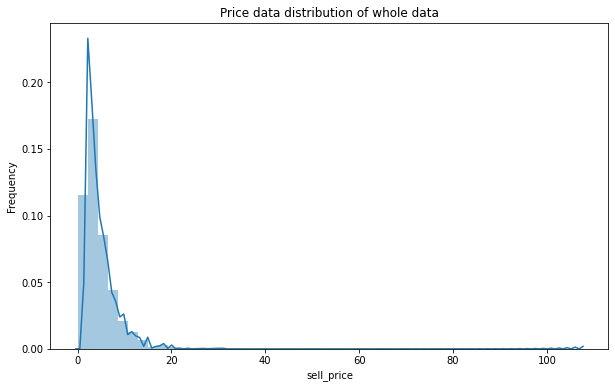

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.distplot(price_df["sell_price"])
plt.title("Price data distribution of whole data")
plt.ylabel("Frequency");

In [54]:
pd.DataFrame(data=price_df.groupby("store_id").sell_price.mean().round(3)).T

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
sell_price,4.414,4.446,4.388,4.422,4.375,4.367,4.387,4.458,4.442,4.418


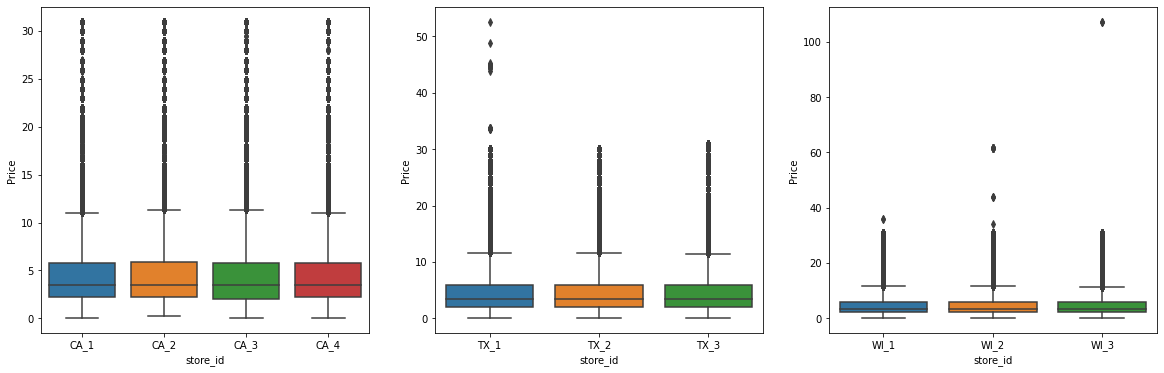

In [ ]:
# box plot
price = price_df.copy()

store_ca = price[(price["store_id"]=='CA_1') | (price["store_id"]=='CA_2') | (price["store_id"]=='CA_3') | (price["store_id"]=='CA_4')]
store_tx = price[(price["store_id"]=='TX_1') | (price["store_id"]=='TX_2') | (price["store_id"]=='TX_3')]
store_wi = price[(price["store_id"]=='WI_1') | (price["store_id"]=='WI_2') | (price["store_id"]=='WI_3')]

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
store_df = [store_ca, store_tx, store_wi]

for i in range(len(store_df)):
    sns.boxplot(x="store_id", y="sell_price", data=store_df[i], ax=ax[i])
    ax[i].set_ylabel("Price")

In [55]:
# Number of events per year
calendar[['year', 'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']].groupby("year").count()

,event_name_1,event_type_1,event_name_2,event_type_2
year,,,,
2011,26,26,1,1
2012,30,30,0,0
2013,29,29,1,1
2014,28,28,2,2
2015,30,30,0,0
2016,19,19,1,1


In [56]:
# Number of flags per year by store
calendar[['year', 'snap_CA', 'snap_TX', 'snap_WI']].groupby("year").sum()

,snap_CA,snap_TX,snap_WI
year,,,
2011,110,110,110
2012,120,120,120
2013,120,120,120
2014,120,120,120
2015,120,120,120
2016,60,60,60


- By State

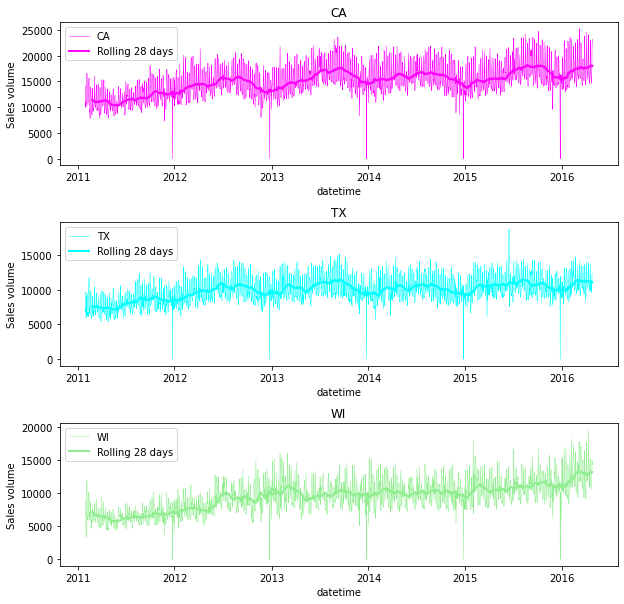

In [57]:
# Create dataframe by grouping
state_group = train_df.groupby("state_id").sum().T
state_group = pd.merge(state_group, cal_df, left_index=True, right_on="d", how="left").set_index('date_dt').drop('date', axis=1)
state_group

# Visualization
fig, ax = plt.subplots(3,1, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

color=["magenta", "cyan", "lightgreen"]
state_col = train_df["state_id"].unique()

for i in range(len(state_col)):
    ax[i].plot(state_group.index, state_group[state_col[i]], color=color[i], linewidth=0.5)
    # Rolling
    ax[i].plot(state_group.index, state_group[state_col[i]].rolling(28).mean(), color=color[i], linewidth=2)
    ax[i].set_xlabel("datetime")
    ax[i].set_ylabel("Sales volume")
    ax[i].legend(["{}".format(state_col[i]), "Rolling 28 days"])
    ax[i].set_title("{}".format(state_col[i]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


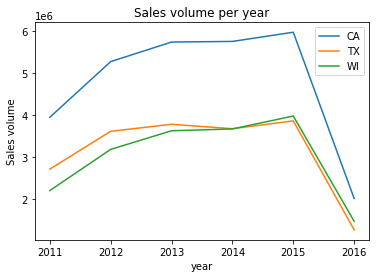

In [ ]:
# Sales volume per year
state_group.groupby("year")['CA', 'TX', 'WI'].sum().plot()
plt.title("Sales volume per year")
plt.ylabel("Sales volume");

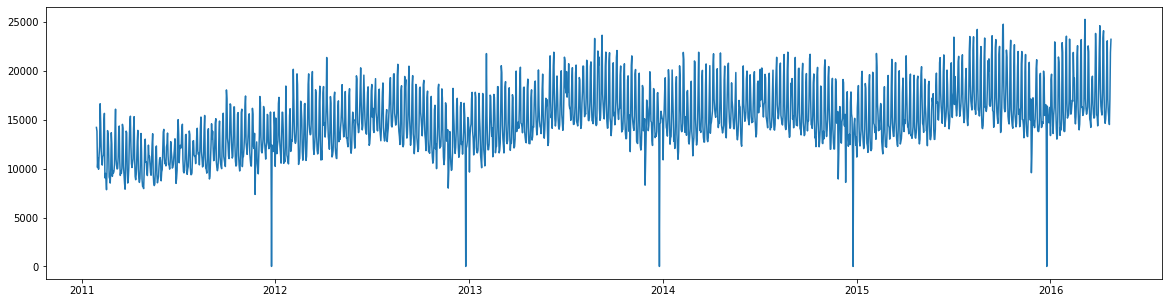

In [ ]:
plt.figure(figsize = (20,5))

plt.plot(state_group['CA'])

<Figure size 1440x1080 with 0 Axes>

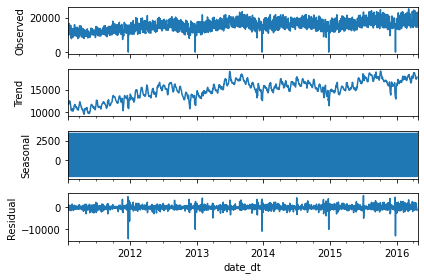

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_CA =seasonal_decompose(state_group['CA'])
 
fig = plt.figure(figsize= (20,15))
fig = result_CA.plot()

In [ ]:
# Define time series analysis function
from pandas.plotting import autocorrelation_plot

def plot_ts_decomp(data, col, lag, color):
    print("Analised Data:{}".format(col.upper()))
    # Stats model
    res = sm.tsa.seasonal_decompose(data[col], period=lag)
    data["trend"] = res.trend
    data["seaso"] = res.seasonal
    data["resid"] = res.resid
    
    # Visualization
    fig = plt.figure(figsize=(20,15))
    grid = plt.GridSpec(4,2, hspace=0.4, wspace=0.2)
    ax1 = fig.add_subplot(grid[0,0])
    ax2 = fig.add_subplot(grid[1,0])
    ax3 = fig.add_subplot(grid[2,0])
    ax4 = fig.add_subplot(grid[3,0])
    ax5 = fig.add_subplot(grid[:-2,1])
    ax6 = fig.add_subplot(grid[2:,1])
    
    # raw price data
    ax1.plot(data.index, data[col], label="price of {}".format(col), color=color, linewidth=0.5)
    ax1.set_xlabel("date")
    ax1.set_ylabel("price")
    ax1.set_title("raw data")
    ax1.legend()
    # trend
    ax2.plot(data.index, data["trend"], label="trend of {}".format(col), color=color, linewidth=3)
    ax2.set_xlabel("date")
    ax2.set_ylabel("trend")
    ax2.set_title("trend")
    ax2.legend()
    # seasonaly
    ax3.plot(data.index, data["seaso"], label="seasonaly of {}".format(col), color=color, linewidth=0.5)
    ax3.set_xlabel("date")
    ax3.set_ylabel("seasonaly")
    ax3.set_title("seasonaly")
    ax3.legend()
    # residual
    ax4.plot(data.index, data["resid"], label="residual error of {}".format(col), color=color, linewidth=0.5)
    ax4.set_xlabel("date")
    ax4.set_ylabel("residual error")
    ax4.set_title("residual")
    ax4.legend()
    # distribution
    sns.distplot(data[col], ax=ax5)
    ax5.set_xlabel("Price")
    ax5.set_ylabel("Frequency")
    ax5.set_title("distribution")
    # auto correlation
    autocorrelation_plot(data[col], ax=ax6, linewidth=0.5)
    ax6.set_title("autocorrelation")

Analised Data:CA


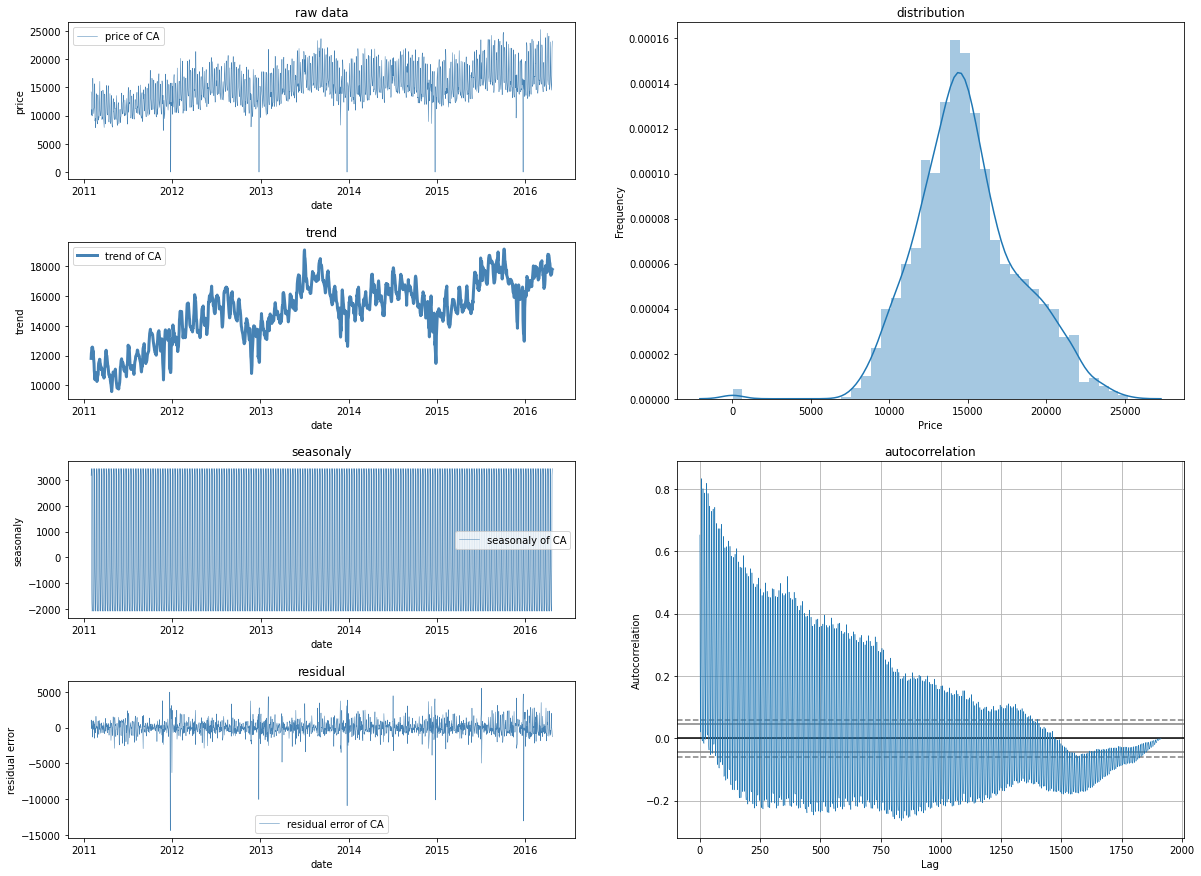

In [86]:
plot_ts_decomp(state_group, "CA", 'steelblue')

# LGBM

In [9]:
import gc
import lightgbm as lgb
from  datetime import datetime, timedelta

In [10]:
# calendar

# Correct data types for "calendar.csv"
calendarDTypes = {"event_name_1": "category", 
                  "event_name_2": "category", 
                  "event_type_1": "category", 
                  "event_type_2": "category", 
                  "weekday": "category", 
                  'wm_yr_wk': 'int16', 
                  "wday": "int16",
                  "month": "int16", 
                  "year": "int16", 
                  "snap_CA": "float32", 
                  'snap_TX': 'float32', 
                  'snap_WI': 'float32' }

In [20]:
calendar = pd.read_csv('calendar.csv', dtype = calendarDTypes)
calendar["date"] = pd.to_datetime(calendar["date"])

for col, colDType in calendarDTypes.items():
    if colDType == "category":
        calendar[col] = calendar[col].cat.codes.astype("int16")
        calendar[col] -= calendar[col].min()

calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,2,1,1,2011,d_1,0,0,0,0,0.0,0.0,0.0
1,2011-01-30,11101,3,2,1,2011,d_2,0,0,0,0,0.0,0.0,0.0
2,2011-01-31,11101,1,3,1,2011,d_3,0,0,0,0,0.0,0.0,0.0
3,2011-02-01,11101,5,4,2,2011,d_4,0,0,0,0,1.0,1.0,0.0
4,2011-02-02,11101,6,5,2,2011,d_5,0,0,0,0,1.0,0.0,1.0


In [25]:
priceDTypes = {"store_id": "category", 
               "item_id": "category", 
               "wm_yr_wk": "int16",
               "sell_price":"float32"}

# Read csv file
prices = pd.read_csv('sell_prices.csv', dtype = priceDTypes)

# Transform categorical features into integers
for col, colDType in priceDTypes.items():
    if colDType == "category":
        prices[col] = prices[col].cat.codes.astype("int16")
        prices[col] -= prices[col].min()
        
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,0,0,11325,9.58
1,0,0,11326,9.58
2,0,0,11327,8.26
3,0,0,11328,8.26
4,0,0,11329,8.26


In [26]:
firstDay = 250
lastDay = 1913

# Use x sales days (columns) for training
numCols = [f"d_{day}" for day in range(firstDay, lastDay+1)]

# Define all categorical columns
catCols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']

# Define the correct data types for "sales_train_validation.csv"
dtype = {numCol: "float32" for numCol in numCols} 
dtype.update({catCol: "category" for catCol in catCols if catCol != "id"})

# Read csv file
ds = pd.read_csv('sales_train_validation.csv', 
                 usecols = catCols + numCols, dtype = dtype)

# Transform categorical features into integers
for col in catCols:
    if col != "id":
        ds[col] = ds[col].cat.codes.astype("int16")
        ds[col] -= ds[col].min()
        
ds = pd.melt(ds,
             id_vars = catCols,
             value_vars = [col for col in ds.columns if col.startswith("d_")],
             var_name = "d",
             value_name = "sales")

# Merge "ds" with "calendar" and "prices" dataframe
ds = ds.merge(calendar, on = "d", copy = False)
ds = ds.merge(prices, on = ["store_id", "item_id", "wm_yr_wk"], copy = False)

ds.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
0,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_250,0.0,2011-10-05,11136,...,10,2011,0,0,0,0,1.0,1.0,1.0,3.97
1,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_251,0.0,2011-10-06,11136,...,10,2011,0,0,0,0,1.0,1.0,1.0,3.97
2,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_252,0.0,2011-10-07,11136,...,10,2011,0,0,0,0,1.0,1.0,0.0,3.97
3,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_250,0.0,2011-10-05,11136,...,10,2011,0,0,0,0,1.0,1.0,1.0,4.34
4,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_251,4.0,2011-10-06,11136,...,10,2011,0,0,0,0,1.0,1.0,1.0,4.34


In [30]:
ds['id']

0           HOBBIES_1_002_CA_1_validation
1           HOBBIES_1_002_CA_1_validation
2           HOBBIES_1_002_CA_1_validation
3           HOBBIES_1_004_CA_1_validation
4           HOBBIES_1_004_CA_1_validation
                        ...              
42372677      FOODS_3_825_WI_3_validation
42372678      FOODS_3_826_WI_3_validation
42372679      FOODS_3_826_WI_3_validation
42372680      FOODS_3_827_WI_3_validation
42372681      FOODS_3_827_WI_3_validation
Name: id, Length: 42372682, dtype: object

In [31]:
dayLags = [7, 28]
lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
    ds[lagSalesCol] = ds[["id","sales"]].groupby("id")["sales"].shift(dayLag)
    
windows = [7, 28]
for window in windows:
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        ds[f"rmean_{dayLag}_{window}"] = ds[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())

In [32]:
dateFeatures = {"wday": "weekday",
                "week": "weekofyear",
                "month": "month",
                "quarter": "quarter",
                "year": "year",
                "mday": "day"}

for featName, featFunc in dateFeatures.items():
    if featName in ds.columns:
        ds[featName] = ds[featName].astype("int16")
    else:
        ds[featName] = getattr(ds["date"].dt, featFunc).astype("int16")

In [33]:
ds.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
0,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_250,0.0,2011-10-05,11136,...,3.97,NaN,NaN,NaN,NaN,NaN,NaN,40,4,5
1,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_251,0.0,2011-10-06,11136,...,3.97,NaN,NaN,NaN,NaN,NaN,NaN,40,4,6
2,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_252,0.0,2011-10-07,11136,...,3.97,NaN,NaN,NaN,NaN,NaN,NaN,40,4,7
3,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_250,0.0,2011-10-05,11136,...,4.34,NaN,NaN,NaN,NaN,NaN,NaN,40,4,5
4,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_251,4.0,2011-10-06,11136,...,4.34,NaN,NaN,NaN,NaN,NaN,NaN,40,4,6


In [34]:
# Remove all rows with NaN value
ds.dropna(inplace = True)

# Define columns that need to be removed
unusedCols = ["id", "date", "sales","d", "wm_yr_wk", "weekday"]
trainCols = ds.columns[~ds.columns.isin(unusedCols)]
X_train = ds[trainCols]
y_train = ds["sales"]

In [35]:
ds.head()

,id,item_id,dept_id,store_id,cat_id,state_id,d,sales,date,wm_yr_wk,...,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
854233,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_305,0.0,2011-11-29,11144,...,3.97,0.0,0.0,0.000000,0.142857,0.178571,0.285714,48,4,29
854234,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_306,0.0,2011-11-30,11144,...,3.97,0.0,0.0,0.000000,0.000000,0.142857,0.285714,48,4,30
854235,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_307,1.0,2011-12-01,11144,...,3.97,0.0,1.0,0.000000,0.142857,0.142857,0.321429,48,4,1
854236,HOBBIES_1_002_CA_1_validation,1,0,0,0,0,d_308,0.0,2011-12-02,11144,...,3.97,0.0,0.0,0.000000,0.142857,0.142857,0.321429,48,4,2
854240,HOBBIES_1_004_CA_1_validation,3,0,0,0,0,d_305,1.0,2011-11-29,11144,...,4.34,1.0,1.0,1.428571,1.428571,1.607143,1.785714,48,4,29


In [36]:
X_train

,item_id,dept_id,store_id,cat_id,state_id,wday,month,year,event_name_1,event_type_1,...,sell_price,lag_7,lag_28,rmean_7_7,rmean_28_7,rmean_7_28,rmean_28_28,week,quarter,mday
854233,1,0,0,0,0,4,11,2011,0,0,...,3.97,0.0,0.0,0.000000,0.142857,0.178571,0.285714,48,4,29
854234,1,0,0,0,0,5,11,2011,0,0,...,3.97,0.0,0.0,0.000000,0.000000,0.142857,0.285714,48,4,30
854235,1,0,0,0,0,6,12,2011,0,0,...,3.97,0.0,1.0,0.000000,0.142857,0.142857,0.321429,48,4,1
854236,1,0,0,0,0,7,12,2011,0,0,...,3.97,0.0,0.0,0.000000,0.142857,0.142857,0.321429,48,4,2
854240,3,0,0,0,0,4,11,2011,0,0,...,4.34,1.0,1.0,1.428571,1.428571,1.607143,1.785714,48,4,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42372677,3046,6,9,2,2,2,4,2016,0,0,...,3.98,0.0,1.0,1.000000,0.714286,0.928571,1.250000,16,2,24
42372678,3047,6,9,2,2,1,4,2016,0,0,...,1.28,0.0,2.0,0.857143,1.142857,1.035714,1.107143,16,2,23
42372679,3047,6,9,2,2,2,4,2016,0,0,...,1.28,1.0,4.0,0.714286,1.571429,1.035714,1.250000,16,2,24
42372680,3048,6,9,2,2,1,4,2016,0,0,...,1.00,0.0,0.0,0.000000,2.285714,1.821429,1.785714,16,2,23


In [37]:
np.random.seed(777)

# Define categorical features
catFeats = ['item_id', 'dept_id','store_id', 'cat_id', 'state_id'] + \
           ["event_name_1", "event_name_2", "event_type_1", "event_type_2"]

validInds = np.random.choice(X_train.index.values, 2_000_000, replace = False)
trainInds = np.setdiff1d(X_train.index.values, validInds)

trainData = lgb.Dataset(X_train.loc[trainInds], label = y_train.loc[trainInds], 
                        categorical_feature = catFeats, free_raw_data = False)
validData = lgb.Dataset(X_train.loc[validInds], label = y_train.loc[validInds],
                        categorical_feature = catFeats, free_raw_data = False)

In [38]:
params = {
          "objective" : "poisson",
          "metric" :"rmse",
          "force_row_wise" : True,
          "learning_rate" : 0.075,
          "sub_row" : 0.75,
          "bagging_freq" : 1,
          "lambda_l2" : 0.1,
          "metric": ["rmse"],
          'verbosity': 1,
          'num_iterations' : 1200,
          'num_leaves': 128,
          "min_data_in_leaf": 100,
         }

In [39]:
# Train LightGBM model
m_lgb = lgb.train(params, trainData, valid_sets = [validData], verbose_eval = 20) 

/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/home/seongung.choi.conda/anaconda3/envs/kubig-venv/lib/python3.8/site-packages/lightgbm/basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[20]	valid_0's rmse: 3.28681
[40]	valid_0's rmse: 2.70005
[60]	valid_0's rmse: 2.53834
[80]	valid_0's rmse: 2.49252
[100]	valid_0's rmse: 2.47906
[120]	valid_0's rmse: 2.46979
[140]	valid_0's rmse: 2.46193
[160]	valid_0's rmse: 2.45399
[180]	valid_0's rmse: 2.44819
[200]	valid_0's rmse: 2.44099
[220]	valid_0's rmse: 2.43385
[240]	valid_0's rmse: 2.42696
[260]	valid_0's rmse: 2.42235
[280]	valid_0's rmse: 2.41748
[300]	valid_0's rmse: 2.41332
[320]	valid_0's rmse: 2.4084
[340]	valid_0's rmse: 2.40358
[360]	valid_0's rmse: 2.39936
[380]	valid_0's rmse: 2.39551
[400]	valid_0's rmse: 2.39156
[420]	valid_0's rmse: 2.38789
[440]	valid_0's rmse: 2.38646
[460]	valid_0's rmse: 2.38375
[480]	valid_0's rmse: 2.38086
[500]	valid_0's rmse: 2.37888
[520]	valid_0's rmse: 2.3763
[540]	valid_0's rmse: 2.37348
[560]	valid_0's rmse: 2.37117
[580]	valid_0's rmse: 2.36867
[600]	valid_0's rmse: 2.36662
[620]	valid_0's rmse: 2.36517
[640]	valid_0's rmse: 2.36317
[660]	valid_0's rmse: 2.36121
[680]	valid_0's 

In [40]:
# Save the model
m_lgb.save_model("model.lgb")

In [43]:
# Last day used for training
trLast = 1913
# Maximum lag day
maxLags = 57

# Create dataset for predictions
def create_ds():
    
    startDay = trLast - maxLags
    
    numCols = [f"d_{day}" for day in range(startDay, trLast + 1)]
    catCols = ['id', 'item_id', 'dept_id','store_id', 'cat_id', 'state_id']
    
    dtype = {numCol:"float32" for numCol in numCols} 
    dtype.update({catCol: "category" for catCol in catCols if catCol != "id"})
    
    ds = pd.read_csv("sales_train_validation.csv", 
                     usecols = catCols + numCols, dtype = dtype)
    
    for col in catCols:
        if col != "id":
            ds[col] = ds[col].cat.codes.astype("int16")
            ds[col] -= ds[col].min()
    
    for day in range(trLast + 1, trLast+ 28 +1):
        ds[f"d_{day}"] = np.nan
    
    ds = pd.melt(ds,
                 id_vars = catCols,
                 value_vars = [col for col in ds.columns if col.startswith("d_")],
                 var_name = "d",
                 value_name = "sales")
    
    ds = ds.merge(calendar, on = "d", copy = False)
    ds = ds.merge(prices, on = ["store_id", "item_id", "wm_yr_wk"], copy = False)
    
    return ds

def create_features(ds):          
    dayLags = [7, 28]
    lagSalesCols = [f"lag_{dayLag}" for dayLag in dayLags]
    for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
        ds[lagSalesCol] = ds[["id","sales"]].groupby("id")["sales"].shift(dayLag)

    windows = [7, 28]
    for window in windows:
        for dayLag, lagSalesCol in zip(dayLags, lagSalesCols):
            ds[f"rmean_{dayLag}_{window}"] = ds[["id", lagSalesCol]].groupby("id")[lagSalesCol].transform(lambda x: x.rolling(window).mean())
          
    dateFeatures = {"wday": "weekday",
                    "week": "weekofyear",
                    "month": "month",
                    "quarter": "quarter",
                    "year": "year",
                    "mday": "day"}

    for featName, featFunc in dateFeatures.items():
        if featName in ds.columns:
            ds[featName] = ds[featName].astype("int16")
        else:
            ds[featName] = getattr(ds["date"].dt, featFunc).astype("int16")

In [44]:
fday = datetime(2016,4, 25) 
alphas = [1.028, 1.023, 1.018]
weights = [1/len(alphas)] * len(alphas)
sub = 0.

for icount, (alpha, weight) in enumerate(zip(alphas, weights)):

    te = create_ds()
    cols = [f"F{i}" for i in range(1,29)]

    for tdelta in range(0, 28):
        day = fday + timedelta(days=tdelta)
        print(tdelta, day)
        tst = te[(te['date'] >= day - timedelta(days=maxLags)) & (te['date'] <= day)].copy()
        create_features(tst)
        tst = tst.loc[tst['date'] == day , trainCols]
        te.loc[te['date'] == day, "sales"] = alpha * m_lgb.predict(tst) # magic multiplier by kyakovlev

    te_sub = te.loc[te['date'] >= fday, ["id", "sales"]].copy()
    te_sub["F"] = [f"F{rank}" for rank in te_sub.groupby("id")["id"].cumcount()+1]
    te_sub = te_sub.set_index(["id", "F" ]).unstack()["sales"][cols].reset_index()
    te_sub.fillna(0., inplace = True)
    te_sub.sort_values("id", inplace = True)
    te_sub.reset_index(drop=True, inplace = True)
    te_sub.to_csv(f"submission_{icount}.csv",index=False)
    if icount == 0 :
        sub = te_sub
        sub[cols] *= weight
    else:
        sub[cols] += te_sub[cols]*weight
    print(icount, alpha, weight)


sub2 = sub.copy()
sub2["id"] = sub2["id"].str.replace("validation$", "evaluation")
sub = pd.concat([sub, sub2], axis=0, sort=False)
sub.to_csv("submission.csv",index=False)

0 2016-04-25 00:00:00
1 2016-04-26 00:00:00
2 2016-04-27 00:00:00
3 2016-04-28 00:00:00
4 2016-04-29 00:00:00
5 2016-04-30 00:00:00
6 2016-05-01 00:00:00
7 2016-05-02 00:00:00
8 2016-05-03 00:00:00
9 2016-05-04 00:00:00
10 2016-05-05 00:00:00
11 2016-05-06 00:00:00
12 2016-05-07 00:00:00
13 2016-05-08 00:00:00
14 2016-05-09 00:00:00
15 2016-05-10 00:00:00
16 2016-05-11 00:00:00
17 2016-05-12 00:00:00
18 2016-05-13 00:00:00
19 2016-05-14 00:00:00
20 2016-05-15 00:00:00
21 2016-05-16 00:00:00
22 2016-05-17 00:00:00
23 2016-05-18 00:00:00
24 2016-05-19 00:00:00
25 2016-05-20 00:00:00
26 2016-05-21 00:00:00
27 2016-05-22 00:00:00
0 1.028 0.3333333333333333
0 2016-04-25 00:00:00
1 2016-04-26 00:00:00
2 2016-04-27 00:00:00
3 2016-04-28 00:00:00
4 2016-04-29 00:00:00
5 2016-04-30 00:00:00
6 2016-05-01 00:00:00
7 2016-05-02 00:00:00
8 2016-05-03 00:00:00
9 2016-05-04 00:00:00
10 2016-05-05 00:00:00
11 2016-05-06 00:00:00
12 2016-05-07 00:00:00
13 2016-05-08 00:00:00
14 2016-05-09 00:00:00
15 2

In [47]:
sub = pd.read_csv('submission.csv')

In [48]:
sub

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,FOODS_1_001_CA_1_validation,0.900208,0.850305,0.835608,0.808511,1.068399,1.240130,1.336629,1.036806,1.005700,...,1.092689,1.365811,1.295096,1.031251,0.891944,0.860488,0.856106,1.017545,1.251653,1.239822
1,FOODS_1_001_CA_2_validation,0.826054,0.846310,0.782934,1.054960,1.074849,1.252265,1.328782,0.880883,0.909217,...,1.181405,1.557242,1.386192,0.970276,0.924556,0.938212,0.979735,1.167277,1.548789,1.305731
2,FOODS_1_001_CA_3_validation,1.224390,1.119274,0.986613,0.970576,1.063056,1.244171,1.236825,1.119709,1.136489,...,1.119759,1.659144,1.779672,1.205213,1.135750,0.970688,0.960264,1.045668,1.342048,1.268581
3,FOODS_1_001_CA_4_validation,0.401395,0.349750,0.346810,0.351312,0.421821,0.429025,0.513803,0.390084,0.421533,...,0.446922,0.482879,0.506504,0.376197,0.348040,0.360557,0.360273,0.411056,0.442214,0.451804
4,FOODS_1_001_TX_1_validation,0.220046,0.218440,0.224843,0.227519,0.220456,0.218982,0.261482,0.561683,0.514396,...,0.410909,0.429856,0.445446,0.311021,0.270962,0.270666,0.281360,0.309801,0.366692,0.352464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60975,HOUSEHOLD_2_516_TX_2_evaluation,0.283826,0.260213,0.288633,0.284374,0.353788,0.432488,0.343618,0.238760,0.241598,...,0.292015,0.364561,0.354640,0.247517,0.237433,0.247504,0.243218,0.303119,0.364744,0.331955
60976,HOUSEHOLD_2_516_TX_3_evaluation,0.167784,0.155329,0.171575,0.161759,0.198939,0.226477,0.171531,0.124789,0.121023,...,0.161521,0.179582,0.165588,0.139283,0.134267,0.140085,0.144291,0.175704,0.196398,0.178692
60977,HOUSEHOLD_2_516_WI_1_evaluation,0.091761,0.084142,0.083611,0.091436,0.103181,0.113265,0.104594,0.096435,0.092222,...,0.129596,0.143583,0.136628,0.099333,0.094709,0.095401,0.100408,0.138073,0.152469,0.144974
60978,HOUSEHOLD_2_516_WI_2_evaluation,0.042751,0.040404,0.040279,0.087703,0.106358,0.104421,0.097441,0.090797,0.090362,...,0.133645,0.132977,0.121293,0.105357,0.100162,0.110588,0.089548,0.112372,0.111862,0.102366
